In [1]:
import os
import networkx as nx

CODE_DIR = r"C:\Users\franc\projects"

def parse_input():
    with open(os.path.join(CODE_DIR, r"advent-of-code\2023\day_25\a_input.txt")) as f:
        input_txt = f.read()

    edges = set()
    nodes = set()
    for edges_row in input_txt.splitlines():
        node, connected_nodes_str = edges_row.split(": ")
        nodes.add(node)
        for conn_node in connected_nodes_str.split():
            edges.add((node, conn_node))
            nodes.add(conn_node)

    return nodes, edges

nodes, edges = parse_input()

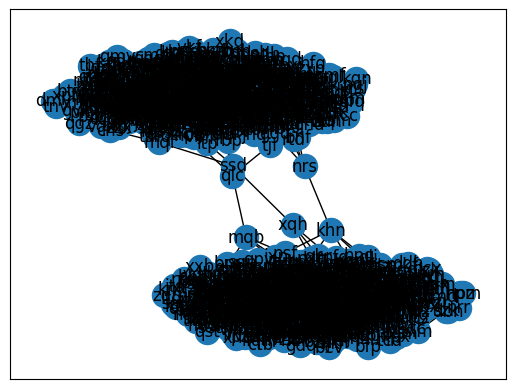

In [2]:
# Check graph for weak links between components
G = nx.Graph()
G.add_edges_from(edges)

nx.draw_networkx(G)

In [3]:
# remove set of 3 edges (x2 since they are undirected) seen from graph
new_edges = edges - set([("mqb", "qlc"), ("xqh", "ssd"), ("khn", "nrs"), 
                         ("qlc", "mqb"), ("ssd", "xqh"), ("nrs", "khn")])

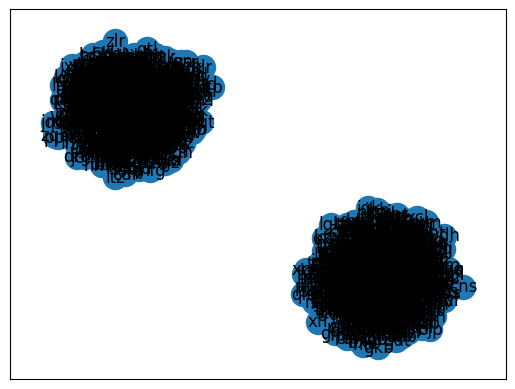

In [4]:
# create new graph and plot it for a visual check
G_new = nx.Graph()
G_new.add_edges_from(new_edges)

nx.draw_networkx(G_new)

In [5]:
component_sizes = []

for cc in nx.connected_components(G_new):
    component_sizes.append(len(cc))

# check that there are only 2 conn. components 
assert len(component_sizes) == 2

# get the final score
score = 1
for cc_size in component_sizes:
    score *= cc_size
print(score)

619225
